In [1]:
import cv2
import numpy as np, pathlib
import matplotlib.pyplot as plt 

import os

In [2]:
#img = cv2.imread("test.png")
# img = cv2.imread("0009.jpg")
# blurred = cv2.blur(img, (3,3))
# canny = cv2.Canny(blurred, 50, 200)

images = pathlib.Path('./')
images = [str(i) for i in images.glob('*.jpg')]

In [3]:
## find the non-zero min-max coords of canny
# pts = np.argwhere(canny>0)
# y1,x1 = pts.min(axis=0)
# y2,x2 = pts.max(axis=0)

gelenler 0006.jpg
1 olması gereken ölçü 1185 2316 566
gelenler 0007.jpg
1 olması gereken ölçü 1593 3114 760
gelenler 0005.jpg
1 olması gereken ölçü 1239 2422 591
gelenler 0004.jpg
2 olması gereken ölçü 1682 3287 306
gelenler 0001.jpg
1 olması gereken ölçü 1378 2693 658
gelenler 0003.jpg
2 olması gereken ölçü 1625 3176 306
gelenler 0002.jpg
2 olması gereken ölçü 1277 2496 60
gelenler 0009.jpg
2 olması gereken ölçü 1687 3298 454
gelenler 0008.jpg
1 olması gereken ölçü 1279 2500 610


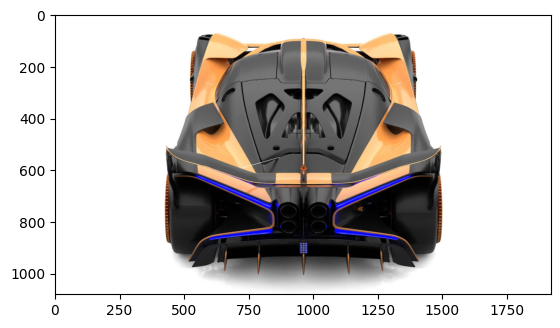

In [4]:
for image in images:
    p = image.split('.')[0]
    name = f'{int(p)}.jpg'

    print("gelenler", image)

    img = cv2.imread(image)
    blurred = cv2.blur(img, (3,3))
    canny = cv2.Canny(blurred, 50, 200)

    pts = np.argwhere(canny>0)
    y1,x1 = pts.min(axis=0)
    y2,x2 = pts.max(axis=0)

    ideal_aspect = 1720/880
    width = y2 - y1
    height = x2 - x1
    olmasi_gereken_height = width*ideal_aspect
    olmasi_gereken_width = height/ideal_aspect
    aspect = height/width

    if aspect > ideal_aspect:
        print("2 olması gereken ölçü", round(olmasi_gereken_width), height, abs(round((olmasi_gereken_width-width)/2)))
        y1 -= abs(round((olmasi_gereken_width-width)/2))
        y2 += abs(round((olmasi_gereken_width-width)/2))
    else:
        print("1 olması gereken ölçü", width, round(olmasi_gereken_height), abs(round((olmasi_gereken_height-width)/2)))
        x1 -= abs(round((olmasi_gereken_height-height)/2))
        x2 += abs(round((olmasi_gereken_height-height)/2))

    cropped = img[y1-100:y2+100, x1-100:x2+100]

    resized = cv2.resize(cropped,(1920,1080), interpolation = cv2.INTER_AREA)
    cv2.imwrite(name,resized)
    plt.imshow(resized)

In [5]:
# ## crop the region
# cropped = img[y1-100:y2+100, x1-100:x2+100]

# resized = cv2.resize(cropped,(1920,1080), interpolation = cv2.INTER_AREA)
# print('resized size',resized.shape)
# cv2.imwrite('resized.png',resized)
# plt.imshow(resized)